# Notebook 2: Reading Data

Welcome! The main goal of this notebook is to read the Cubeset data, and get know its different calsses.

---

The dataset we will be working with contains five classes, described as follows:
- **Blurry**: Data captured while the satellite is in motion, resulting in blurred images.
- **Corrupt**: Images with defects from improper camera priming or stray light.
- **Missing Data**: Images with partial or complete data loss.
- **Noisy**: Images over-saturated with noise from radiation or other sources.
- **Priority**: Clear images suitable for scientific analysis on the ground.

---

#### Importing libraries

In [1]:
from source.pre import read_images_from_folder # A custom function that reads .jpg images from a folder and returns them as a stacked NumPy array.
import os  # Importing the 'os' module for interacting with the operating system, such as handling file paths.
from concurrent.futures import ProcessPoolExecutor  # Importing 'ProcessPoolExecutor' for parallel execution using multiple processors.
import matplotlib.pyplot as plt  # Importing Matplotlib for creating visualizations and plots.
import random  # Importing the 'random' module for generating random numbers and making random selections.
import numpy as np  # Importing NumPy, a library for numerical operations, used here for handling and manipulating image data arrays.

In [2]:
folders = ["Blurry", "Corrupt", "Missing_Data", "Noisy", "Priority"] # The 5 classes of our data
base_dir = "data/" # Where the data sets
images_by_class = {} # Dictionary to store images by class



#### Read images from each folder/class


In [3]:
# Function to read images from a specific folder
# This function is designed to be used with ProcessPoolExecutor for parallel processing.
# It takes a folder name, constructs the full path, reads all images, and returns both the folder name and the images.
def process_folder(folder):
    folder_path = os.path.join(base_dir, folder)
    images = read_images_from_folder(folder_path)
    return folder, images

---

In [4]:
# Use ProcessPoolExecutor to parallelize the folder processing
with ProcessPoolExecutor(max_workers=5) as executor:
    results = executor.map(process_folder, folders)

# Collect the results
for folder, images in results:
    images_by_class[folder] = images

In [5]:
total_images = 0  # Initialize a counter for the total number of images

for folder, images in images_by_class.items():
    num_images = len(images)
    print(f"Class '{folder}': {num_images} images read.")
    total_images += num_images  # Add the number of images in the current class to the total

# Print the total number of images for all classes
print(f"Total images read across all classes: {total_images}")

Class 'Blurry': 3544 images read.
Class 'Corrupt': 1070 images read.
Class 'Missing_Data': 2021 images read.
Class 'Noisy': 3582 images read.
Class 'Priority': 5968 images read.
Total images read across all classes: 16185


---

### Visualization 

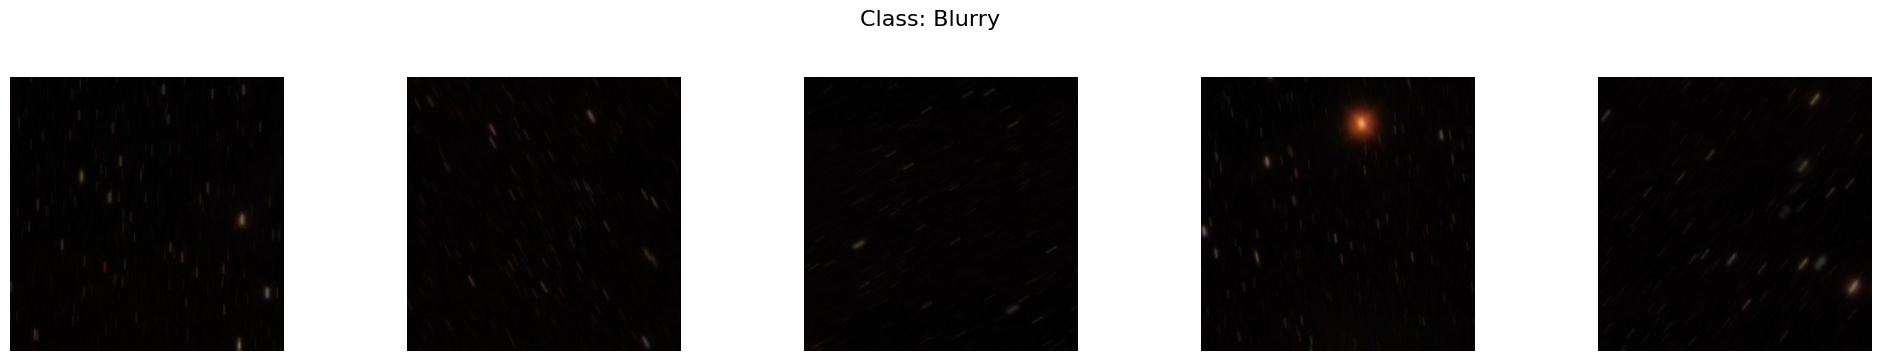

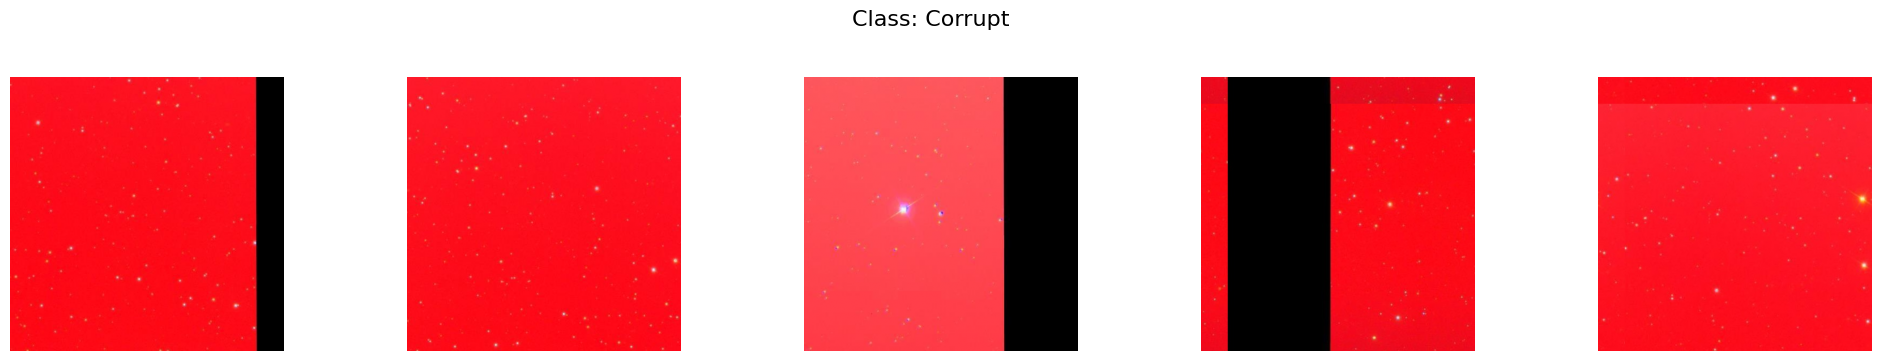

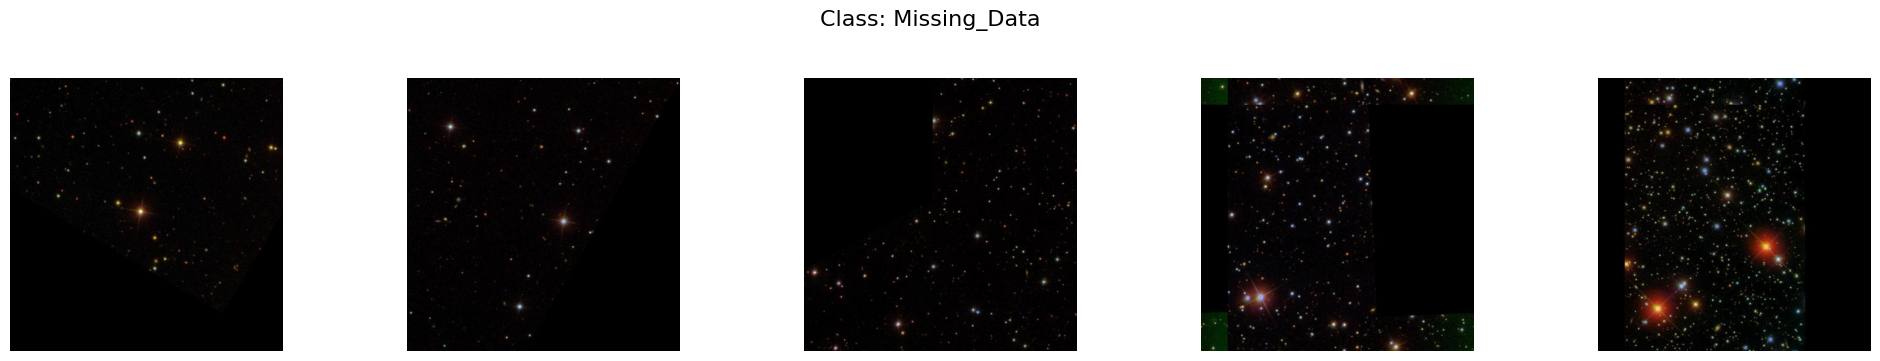

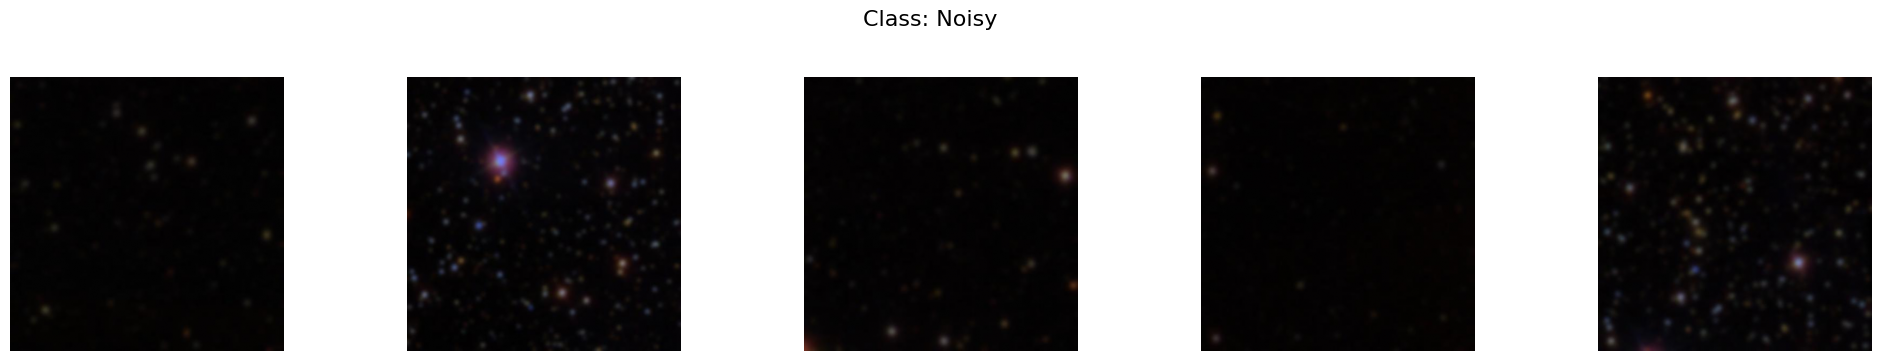

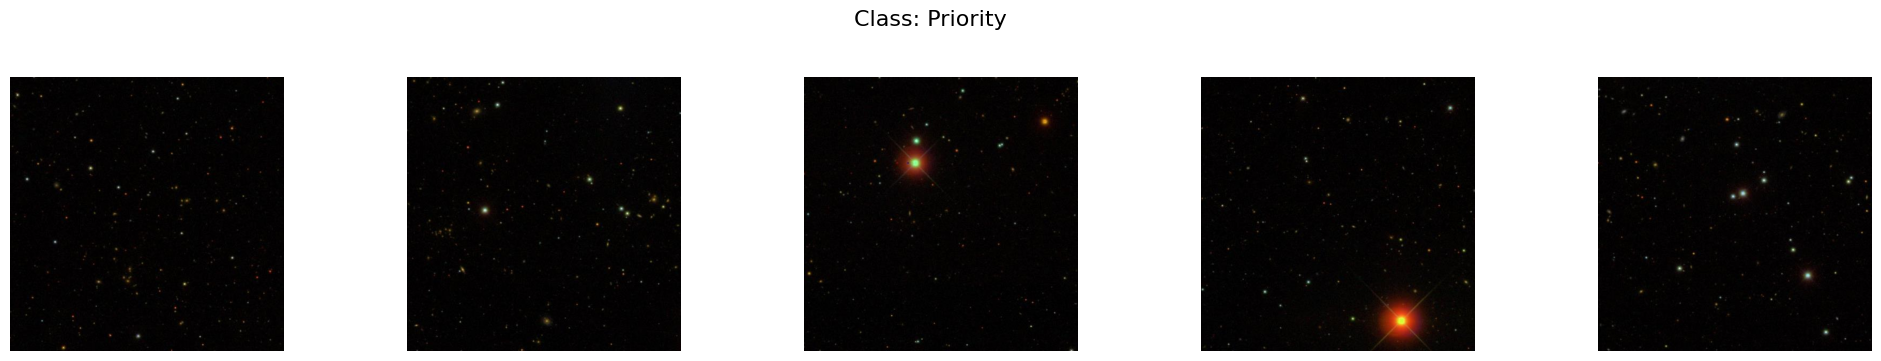

In [6]:
random.seed(42)

# Assuming images_by_class is your dictionary
# where keys are class names and values are numpy arrays of images

for folder, images in images_by_class.items():    
    # Ensure we have at least 5 images
    num_images_to_display = min(5, len(images))
    
    # Randomly select 5 images
    random_indices = random.sample(range(len(images)), num_images_to_display)
    selected_images = images[random_indices] / 255.0

    # Plot the selected images
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))
    fig.suptitle(f'Class: {folder}', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    for i, ax in enumerate(axes):
        ax.imshow(selected_images[i])
        ax.axis('off')
    
    plt.show()
    print()

The images in the dataset appear to have distinct visual characteristics that make them easy to classify by eye. For example, “Blurry,” “Corrupt,” and “Missing Data” images each have unique visual patterns and anomalies that differentiate them from one another. Given these clear differences, we can reasonably expect that machine learning models would also be able to classify these images with high accuracy, as the features that distinguish each class are visually pronounced and easily identifiable.

---

### Pre-processing

#### Converting Images and Labels to NumPy Arrays

Now we save the data into a NumPy array for easier use in machine learning, and to realise that we can follow these steps:

-	Combine All Images and Labels: It gathers all images and their corresponding labels into two lists.
-	Convert to NumPy Arrays: It converts these lists into NumPy arrays, which are easier to handle for machine learning tasks.


In [7]:

# Initialize lists to hold all images and labels
all_images = []
all_labels = []

# Iterate through the images_by_class dictionary to collect images and their labels
for label, images in images_by_class.items():
    all_images.extend(images)  # Add all images to the list
    all_labels.extend([label] * len(images))  # Add the corresponding label for each image

# Convert the lists to NumPy arrays
all_images_np = np.array(all_images)
all_labels_np = np.array(all_labels)



#### Encoding the Labels

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels_np)

print("Original Labels:", all_labels_np)
print("Encoded Labels:", all_labels_encoded)

Original Labels: ['Blurry' 'Blurry' 'Blurry' ... 'Priority' 'Priority' 'Priority']
Encoded Labels: [0 0 0 ... 4 4 4]


#### Shuffling and splitting the data

In [10]:
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and testing sets

# Split the data: 80% training, 20% test
train_images, test_images, train_labels, test_labels = train_test_split(all_images_np, all_labels_encoded, test_size=0.2, random_state=42, shuffle=True)
print(f"Training data: {len(train_images)} images")
print(f"Testing data: {len(test_images)} images")

Training data: 12948 images
Testing data: 3237 images


#### Saving the data

In [ ]:
# Save the combined images and labels arrays to disk for future use
np.save('train_images.npy', train_images)
np.save('test_images.npy', test_images)
np.save('train_labels.npy', train_labels)
np.save('test_labels.npy', test_labels)

print("Data saved successfully as NumPy arrays.")

---

### Finally, removing data from memory

**⚠️ Important Notice**: Since this code is being executed in a shared environment (ilifu), freeing up memory is crucial to ensure efficient resource usage. By removing unused data, it helps prevent memory bottlenecks that could affect not only your work but also the performance of other users relying on the shared hardware. This is especially important when working with large datasets (like in our case), as excessive memory usage can slow down the overall system and reduce availability for others using the same resources.

**Make sure to follow this same practice when you develop your own pipeline during the hackathon to optimize performance and resource allocation.**

In [ ]:
import gc

# Remove the data from memory
del train_images, test_images, train_labels, test_labels, all_images_np, all_labels_np

# Force garbage collection to free up memory
gc.collect()

print("Data removed from memory.")